In [1]:
from PIL import Image
from sklearn.cluster import KMeans

In [2]:
image = Image.open('dogs.jpeg') # 4 colors
#image = Image.open('tiger.png') # 12 colors
#image = Image.open('multiple_colorsjpg.jpg') #12 colors

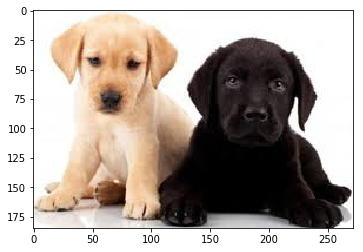

In [3]:
from matplotlib import pyplot as plot
%matplotlib inline
plot.imshow(image)
no_of_colors = 4

In [4]:
import numpy as np

image_np = np.asarray(image)

In [5]:
#image_np

In [6]:
# The shape of the array is (185, 272, 3). The first two values match the pixels of the image.
# Third value is set to 3 as each pixel is represented as a combination of three colors, Red,
# Blue and Green.
image_np.shape
x = image_np.shape[0]
y = image_np.shape[1]
z = image_np.shape[2]

In [7]:
# KMeans expects the input to be of two dimensions, so we use Numpy’s reshape function to
# reshape the image data.
image_np = image_np.reshape((x*y,z))

In [8]:
image_np.shape

(50320, 3)

In [9]:
# KMeans algorithm creates clusters based on the supplied count of clusters. In our case, 
# it will form clusters of colors and these clusters will be our top colors. We then fit 
# and predict on the same image to extract the prediction into the variable labels.
kmeans = KMeans(n_clusters=no_of_colors, random_state=1)
kmeans.fit(image_np)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [10]:
labels = kmeans.predict(image_np)
#labels = kmeans.fit_predict(image_np)

In [11]:
image_np.shape

(50320, 3)

In [12]:
labels = labels.reshape((x,y))

In [13]:
labels.shape

(185, 272)

In [14]:
#labels[121]

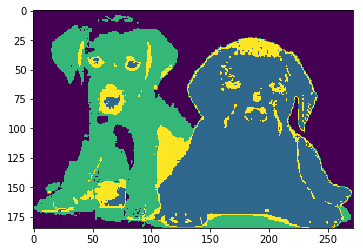

In [15]:
plot.imshow(labels)

In [16]:
# To find the colors, we will use kmeans.cluster_centers_
kmeans.cluster_centers_

array([[252.14121389, 249.29271137, 245.75557911],
       [ 19.83360041,  14.05153516,  14.06954682],
       [219.47637004, 184.49061505, 152.98491704],
       [105.03010204,  80.59540816,  68.55994898]])

In [17]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [18]:
# Convert color values to integer
centers = [centers.astype(int) for centers in kmeans.cluster_centers_]

In [19]:
centers

[array([252, 249, 245]),
 array([19, 14, 14]),
 array([219, 184, 152]),
 array([105,  80,  68])]

In [20]:
# To create 100*100 color block
blob = np.ones((100,100,3))

In [21]:
print(type(labels))
print(labels.shape)
#print(labels[15])
#print(labels[100])
#print(labels[101])

<class 'numpy.ndarray'>
(185, 272)


In [22]:
# Count the occurrence of an item in a numpy array, 'collections.Counter'. It generates a 
# dictionary with items as keys and their counts as values. 
# Have a look at the following example.
# >> import collections, numpy

# >>> a = numpy.array([0, 3, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 3, 4])
# >>> collections.Counter(a)
# Counter({0: 7, 1: 4, 3: 2, 2: 1, 4: 1})

from collections import Counter
counts = Counter(labels.reshape(x*y))

counts

Counter({0: 18851, 2: 11950, 3: 3943, 1: 15576})

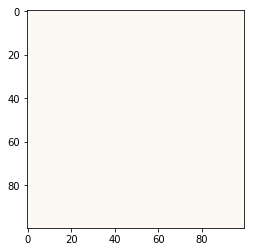

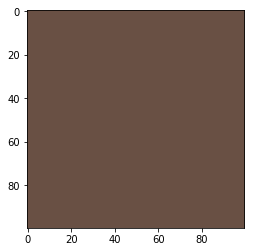

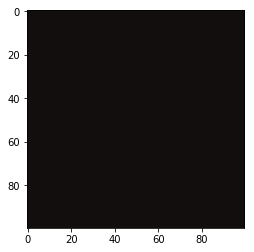

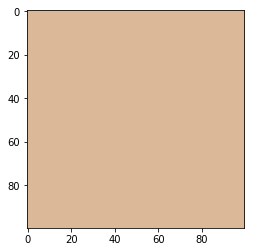

In [23]:
ordered_colors = [centers[i]/255 for i in counts.keys()] # Why we should divide by 255 ?
myblob = []
j = 0
myblob = [blob * ordered_colors[i] for i in counts.keys()]

for i in counts.keys():
    #myblob.append(blob * ordered_colors[i])
    plot.imshow(myblob[j])
    plot.show()
    j = j+1

In [24]:
#blob1 = blob * centers[0]/255
#plot.imshow(blob1)

In [25]:
#blob2 = blob*centers[1]/255
#plot.imshow(blob2)